In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### SIFT

In [2]:
df = pd.read_csv("sift_time_compare.csv")
henn = df[df["method"] == "henn"]
hnsw = df[df["method"] == "hnsw"]

In [3]:
henn = henn[henn["ef"] < 200]
hnsw = hnsw[hnsw["ef"] < 200]

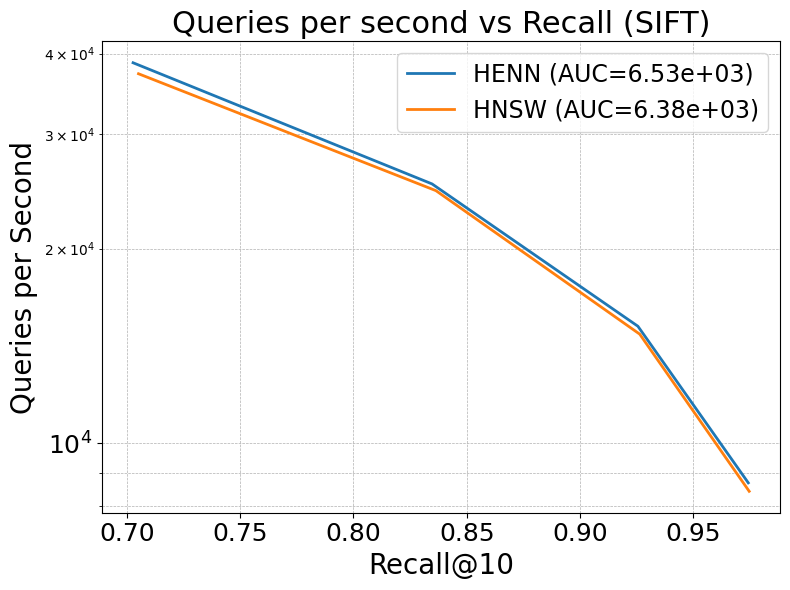

In [6]:
# Compute QPS
henn["QPS"] = 1e4 / henn["time"]
hnsw["QPS"] = 1e4 / hnsw["time"]

# Sort by Recall
henn = henn.sort_values(by="recall")
hnsw = hnsw.sort_values(by="recall")

# Filter common recall range
min_recall = max(henn["recall"].min(), hnsw["recall"].min())
max_recall = min(henn["recall"].max(), hnsw["recall"].max())

# Interpolation on a common recall grid
common_recall = np.linspace(min_recall, max_recall, num=100)
qps_henn_interp = np.interp(common_recall, henn["recall"], henn["QPS"])
qps_hnsw_interp = np.interp(common_recall, hnsw["recall"], hnsw["QPS"])

# AUCs (Optional)
recall_range = common_recall.max() - common_recall.min()
auc_henn = np.trapezoid(qps_henn_interp, common_recall)
auc_hnsw = np.trapezoid(qps_hnsw_interp, common_recall)

# Plot
plt.figure(figsize=(8, 6))

# Plot each with markers and line
plt.plot(
    henn["recall"],
    henn["QPS"],
    label=f"HENN (AUC={auc_henn:.2e})",
    # marker="o",
    linewidth=2,
)
plt.plot(
    hnsw["recall"],
    hnsw["QPS"],
    label=f"HNSW (AUC={auc_hnsw:.2e})",
    # marker="s",
    linewidth=2,
)

# Log scale for QPS (y-axis)
plt.yscale("log")

# Axis labels
plt.xlabel("Recall@10", fontsize=20)
plt.ylabel("Queries per Second", fontsize=20)
plt.title(f"Queries per second vs Recall (SIFT)", fontsize=22)

# Style
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", which="major", labelsize=18)
plt.legend(fontsize=17)
plt.tight_layout()

# Optional: save
# plt.savefig(f"../../figures/recall_vs_time_sift.png", bbox_inches="tight", dpi=300)
plt.show()

### GloVe

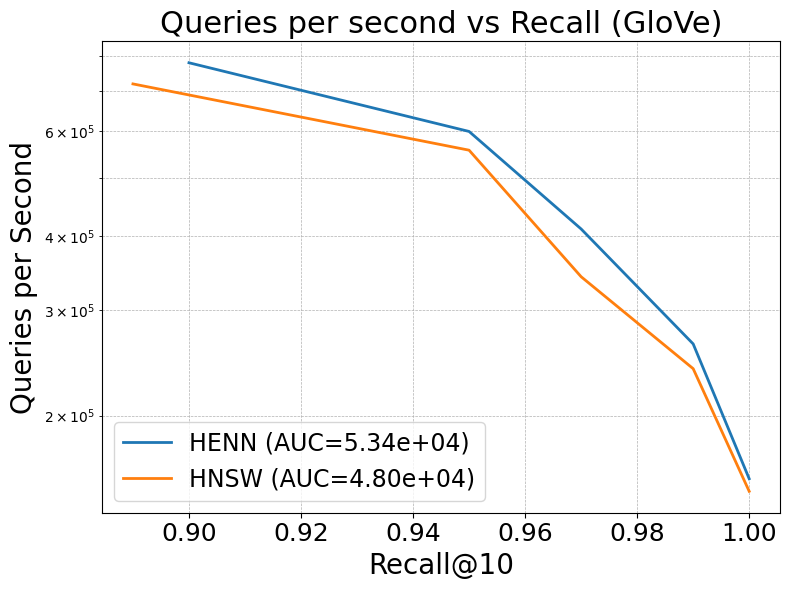

In [ ]:
henn = pd.read_csv("glove_henn.csv")
hnsw = pd.read_csv("glove_hnsw.csv")

# henn = henn.groupby("ef").agg({"time": "min", "recall": "mean"}).reset_index()
# hnsw = hnsw.groupby("ef").agg({"time": "max", "recall": "mean"}).reset_index()

# Compute QPS
henn["QPS"] = 5e4 / henn["time"]
hnsw["QPS"] = 5e4 / hnsw["time"]

# Sort by Recall
henn = henn.sort_values(by="recall")
hnsw = hnsw.sort_values(by="recall")

# Filter common recall range
min_recall = max(henn["recall"].min(), hnsw["recall"].min())
max_recall = min(henn["recall"].max(), hnsw["recall"].max())

# Interpolation on a common recall grid
common_recall = np.linspace(min_recall, max_recall, num=100)
qps_henn_interp = np.interp(common_recall, henn["recall"], henn["QPS"])
qps_hnsw_interp = np.interp(common_recall, hnsw["recall"], hnsw["QPS"])

# AUCs (Optional)
recall_range = common_recall.max() - common_recall.min()
auc_henn = np.trapezoid(qps_henn_interp, common_recall)
auc_hnsw = np.trapezoid(qps_hnsw_interp, common_recall)

# Plot
plt.figure(figsize=(8, 6))

# Plot each with markers and line
plt.plot(
    henn["recall"],
    henn["QPS"],
    label=f"HENN (AUC={auc_henn:.2e})",
    # marker="o",
    linewidth=2,
)
plt.plot(
    hnsw["recall"],
    hnsw["QPS"],
    label=f"HNSW (AUC={auc_hnsw:.2e})",
    # marker="s",
    linewidth=2,
)

# Log scale for QPS (y-axis)
plt.yscale("log")

# Axis labels
plt.xlabel("Recall@10", fontsize=20)
plt.ylabel("Queries per Second", fontsize=20)
plt.title(f"Queries per second vs Recall (GloVe)", fontsize=22)

# Style
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", which="major", labelsize=18)
plt.legend(fontsize=17)
plt.tight_layout()

# Optional: save
# plt.savefig(f"../../figures/recall_vs_time_glove.png", bbox_inches="tight", dpi=300)
plt.show()

### MNIST

/tmp/ipykernel_1953022/2787104282.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  henn["QPS"] = 1e3 / henn["time"]
/tmp/ipykernel_1953022/2787104282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hnsw["QPS"] = 1e3 / hnsw["time"]


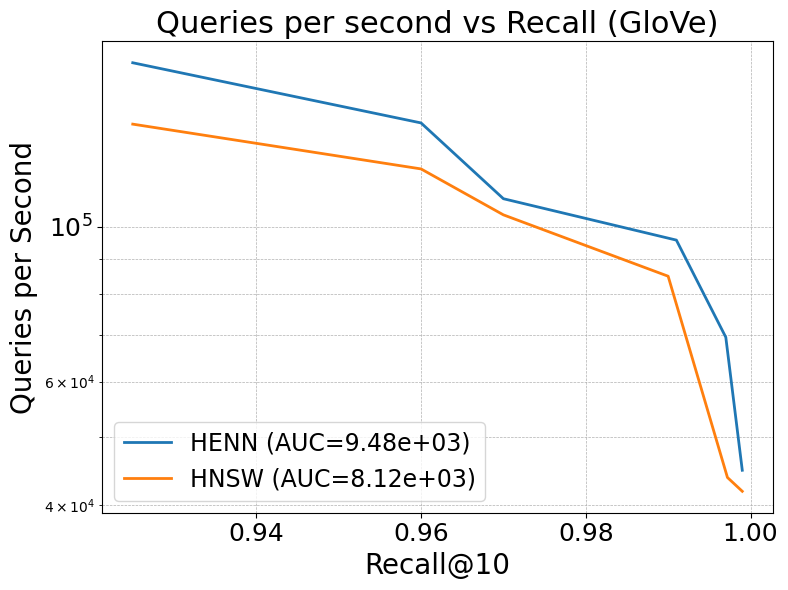

In [ ]:
df = pd.read_csv("mnist_compare.csv")
henn = df[df["method"] == "henn"]
hnsw = df[df["method"] == "hnsw"]

# henn = henn.groupby("ef").agg({"time": "min", "recall": "mean"}).reset_index()
# hnsw = hnsw.groupby("ef").agg({"time": "max", "recall": "mean"}).reset_index()

# Compute QPS
henn["QPS"] = 1e3 / henn["time"]
hnsw["QPS"] = 1e3 / hnsw["time"]

# Sort by Recall
henn = henn.sort_values(by="recall")
hnsw = hnsw.sort_values(by="recall")

# Filter common recall range
min_recall = max(henn["recall"].min(), hnsw["recall"].min())
max_recall = min(henn["recall"].max(), hnsw["recall"].max())

# Interpolation on a common recall grid
common_recall = np.linspace(min_recall, max_recall, num=100)
qps_henn_interp = np.interp(common_recall, henn["recall"], henn["QPS"])
qps_hnsw_interp = np.interp(common_recall, hnsw["recall"], hnsw["QPS"])

# AUCs (Optional)
recall_range = common_recall.max() - common_recall.min()
auc_henn = np.trapezoid(qps_henn_interp, common_recall)
auc_hnsw = np.trapezoid(qps_hnsw_interp, common_recall)

# Plot
plt.figure(figsize=(8, 6))

# Plot each with markers and line
plt.plot(
    henn["recall"],
    henn["QPS"],
    label=f"HENN (AUC={auc_henn:.2e})",
    # marker="o",
    linewidth=2,
)
plt.plot(
    hnsw["recall"],
    hnsw["QPS"],
    label=f"HNSW (AUC={auc_hnsw:.2e})",
    # marker="s",
    linewidth=2,
)

# Log scale for QPS (y-axis)
plt.yscale("log")

# Axis labels
plt.xlabel("Recall@10", fontsize=20)
plt.ylabel("Queries per Second", fontsize=20)
plt.title(f"Queries per second vs Recall (GloVe)", fontsize=22)

# Style
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tick_params(axis="both", which="major", labelsize=18)
plt.legend(fontsize=17)
plt.tight_layout()

# Optional: save
# plt.savefig(f"../../figures/recall_vs_time_mnist.png", bbox_inches="tight", dpi=300)
plt.show()